In [1]:
library(rgdal)
library(raster)
library(ncdf4)
library(lattice)
library(latticeExtra)
library(classInt)
library(RColorBrewer)
library(grid)

Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 
Loading required package: RColorBrewer
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`


In [2]:
out <- '/Users/dongmeichen/Documents/beetle/images/DEA/'

In [3]:
shppath <- "/Users/dongmeichen/Documents/beetle/shp"
mpb10km <- readOGR(dsn = shppath, layer = "mpb10km")
crs <- proj4string(mpb10km)
lonlat <- CRS("+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km"
with 17 features
It has 2 fields


In [4]:
ncfile <- '/Users/dongmeichen/Documents/beetle/ncfiles/mpb10km_grid.nc'
ncin <- nc_open(ncfile)
x <- ncvar_get(ncin, varid="x"); nx <- length(x)
y <- ncvar_get(ncin, varid="y"); ny <- length(y)

In [5]:
lrglakes <- readOGR(dsn = shppath, layer = "mpb10km_lrglakes")
proj4string(lrglakes) <- crs

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km_lrglakes"
with 1 features
It has 2 fields


In [6]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
bioclm <- read.csv(sprintf('%s/mpb10km_bioclm_mean.csv', DATA))
loc <- read.csv(sprintf('%s/location.csv', DATA))
head(bioclm)
head(loc)

OctTmin,fallTmean,JanTmin,MarTmin,Tmin,Tmean,Tvar,TOctSep,TMarAug,summerTmean,⋯,mi,pt.coef,cv.gsp,maxAugT,summerT40,OptTsum,AugMaxT,maxT,ddAugJul,ddAugJun
6.550402,11.41075,3.953422,4.186135,4.300880,10.43695,2.511400,10.44481,11.23925,13.24423,⋯,2.696496,0.7594968,2.911397,28.49163,0,26.81938,28.97848,32.23233,2503.479,2503.479
6.932038,11.64674,4.321562,4.585888,4.677154,10.66482,2.449983,10.67275,11.42478,13.36685,⋯,2.588698,0.7649344,2.862751,26.24068,0,22.85979,27.79307,31.28185,2436.500,2436.500
6.849171,11.41259,4.222184,4.403404,4.568102,10.40306,2.390467,10.41098,11.08644,13.00367,⋯,2.428582,0.7683351,2.800660,23.38509,0,18.08831,26.39009,30.16955,2363.049,2363.049
7.420574,11.75649,4.717864,4.994005,5.074779,10.76089,2.348640,10.76958,11.43688,13.30198,⋯,2.216210,0.7642841,2.757117,21.42757,0,13.72024,25.17339,29.30384,2339.264,2339.264
8.084161,12.23101,5.296612,5.698166,5.689375,11.25544,2.302900,11.26455,11.93345,13.73137,⋯,2.058422,0.7576818,2.751287,20.70239,0,11.27107,24.56373,28.90018,2353.275,2353.275
6.144276,11.34414,3.441402,3.781458,3.844134,10.38734,2.741358,10.39499,11.34436,13.53127,⋯,2.754172,0.7527566,2.879596,30.02286,0,31.77345,30.34541,33.22530,2494.174,2494.174


lon,lat,etopo1,x,y
-124.2879,40.21671,201.27065,-1000000,-460000
-124.3038,40.30570,179.37590,-1000000,-450000
-124.3199,40.39468,323.83456,-1000000,-440000
-124.3360,40.48366,266.47128,-1000000,-430000
-124.3522,40.57263,30.87853,-1000000,-420000
-124.1555,40.14040,296.74728,-990000,-470000


In [7]:
vars <- c('Tmean', 'Tvar', 'fallTmean', 'TOctSep', 'TMarAug', 'ddAugJun', 'ddAugJul',
          'AugTmax', 'AugMaxT', 'maxAugT', 'summerTmean', 'maxT', 'AugTmean', 'Tmin',
          'minT', 'JanTmin', 'OctTmin', 'MarTmin', 'Acs', 'Jan20', 'JanMin', 'Mar20',
          'MarMin', 'winterMin', 'etopo1', 'Pmean', 'summerP0', 'summerP1', 'summerP2', 
          'PcumOctSep', 'wd', 'vpd', 'cwd', 'mi', 'PPT')
data <- cbind(bioclm, loc)[,vars]
summary(data)

     Tmean             Tvar          fallTmean         TOctSep      
 Min.   :-3.389   Min.   : 2.071   Min.   :-2.070   Min.   :-3.384  
 1st Qu.: 6.575   1st Qu.: 7.770   1st Qu.: 7.064   1st Qu.: 6.582  
 Median : 8.908   Median : 8.523   Median : 9.332   Median : 8.915  
 Mean   : 9.942   Mean   : 8.592   Mean   :10.420   Mean   : 9.948  
 3rd Qu.:12.460   3rd Qu.: 9.467   3rd Qu.:12.913   3rd Qu.:12.463  
 Max.   :24.991   Max.   :13.327   Max.   :25.342   Max.   :24.994  
 NA's   :56       NA's   :56       NA's   :56       NA's   :56      
    TMarAug           ddAugJun         ddAugJul         AugTmax     
 Min.   : 0.3196   Min.   : 352.8   Min.   : 358.8   Min.   :15.61  
 1st Qu.:11.7652   1st Qu.:1679.8   1st Qu.:1679.8   1st Qu.:27.49  
 Median :13.9117   Median :2105.1   Median :2105.2   Median :29.78  
 Mean   :14.7941   Mean   :2428.0   Mean   :2428.2   Mean   :29.77  
 3rd Qu.:17.2589   3rd Qu.:2930.2   3rd Qu.:2930.2   3rd Qu.:31.88  
 Max.   :31.0336   Max.   :6773.0 

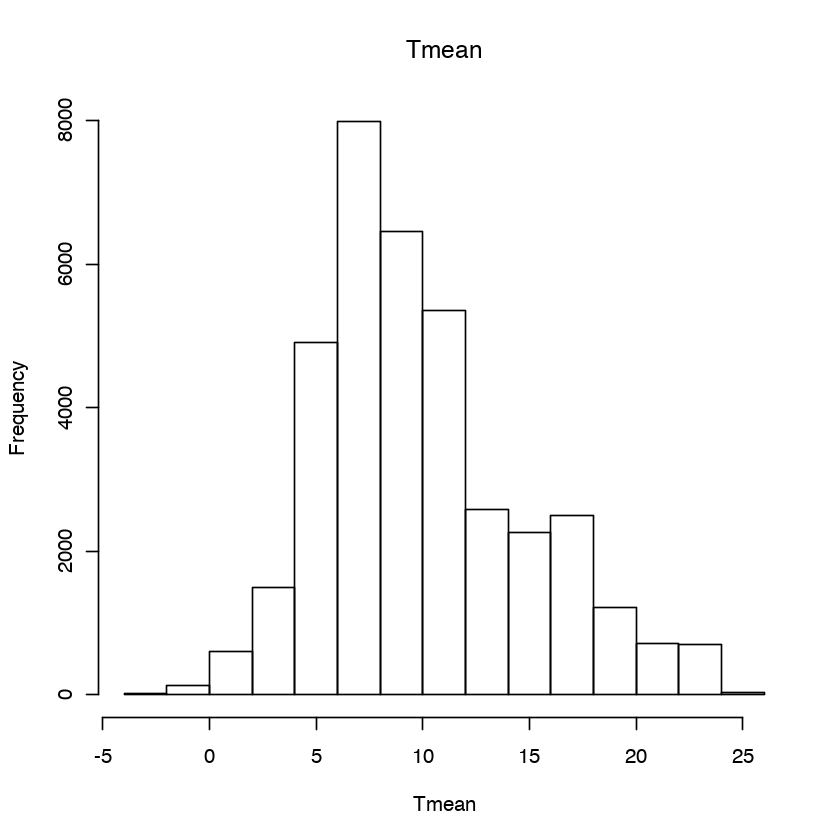

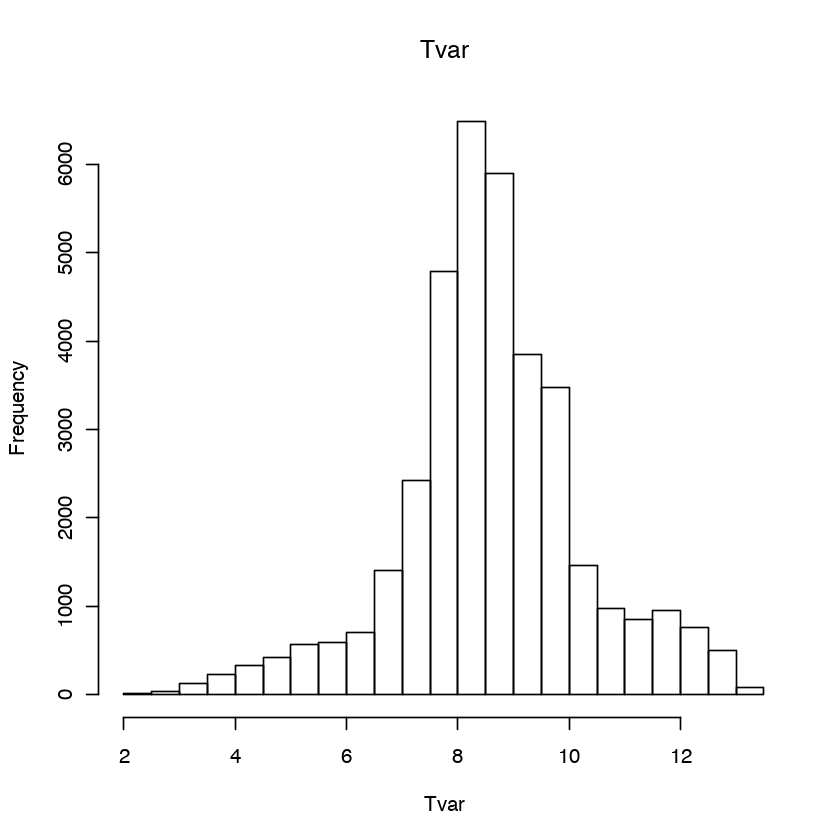

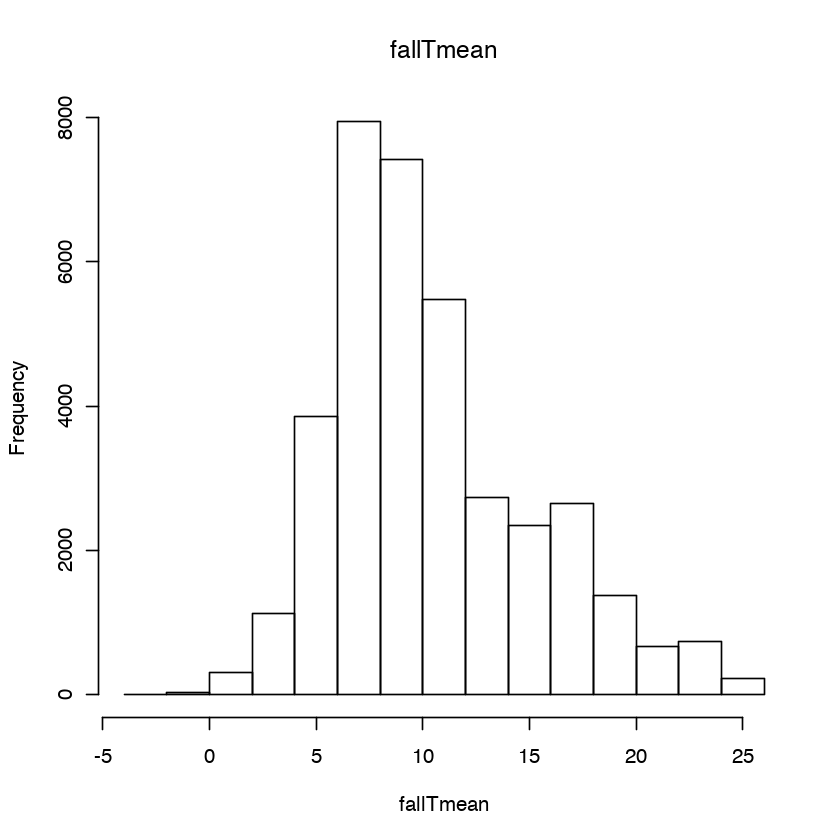

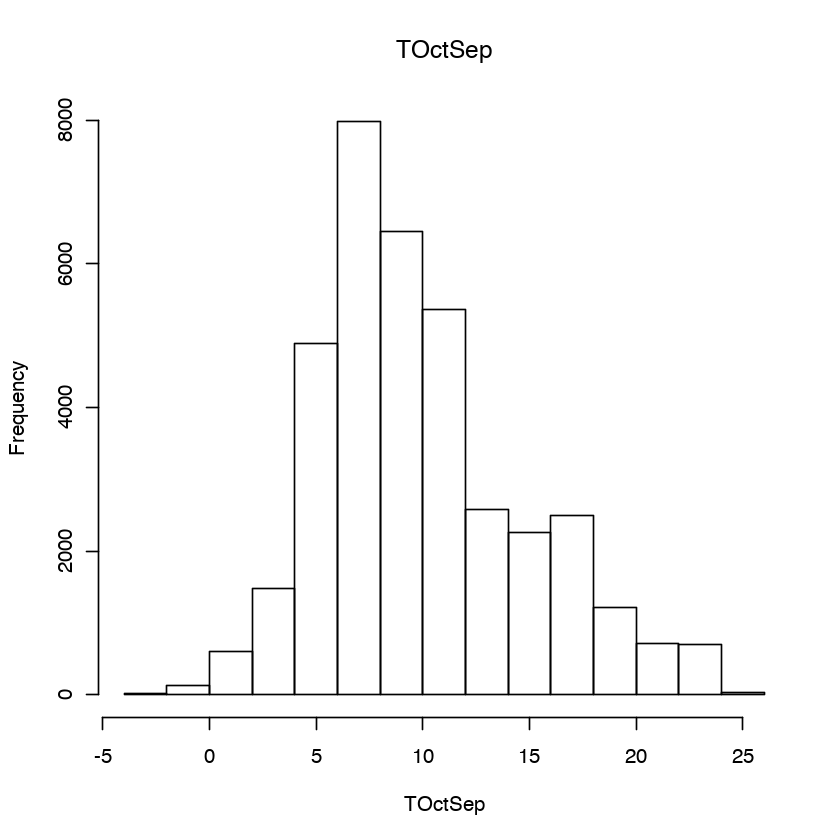

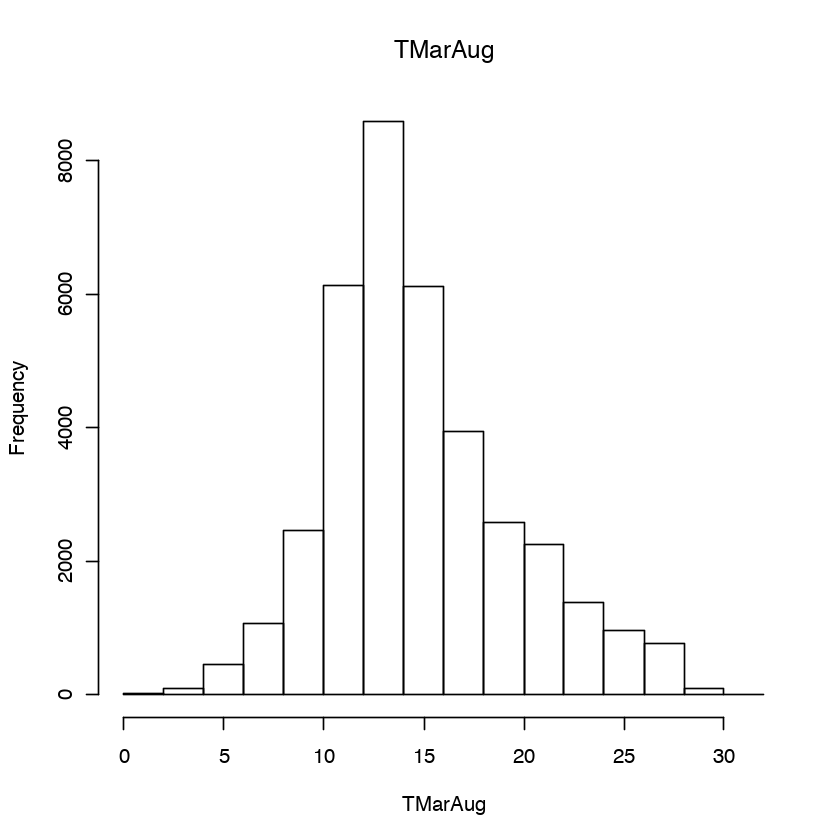

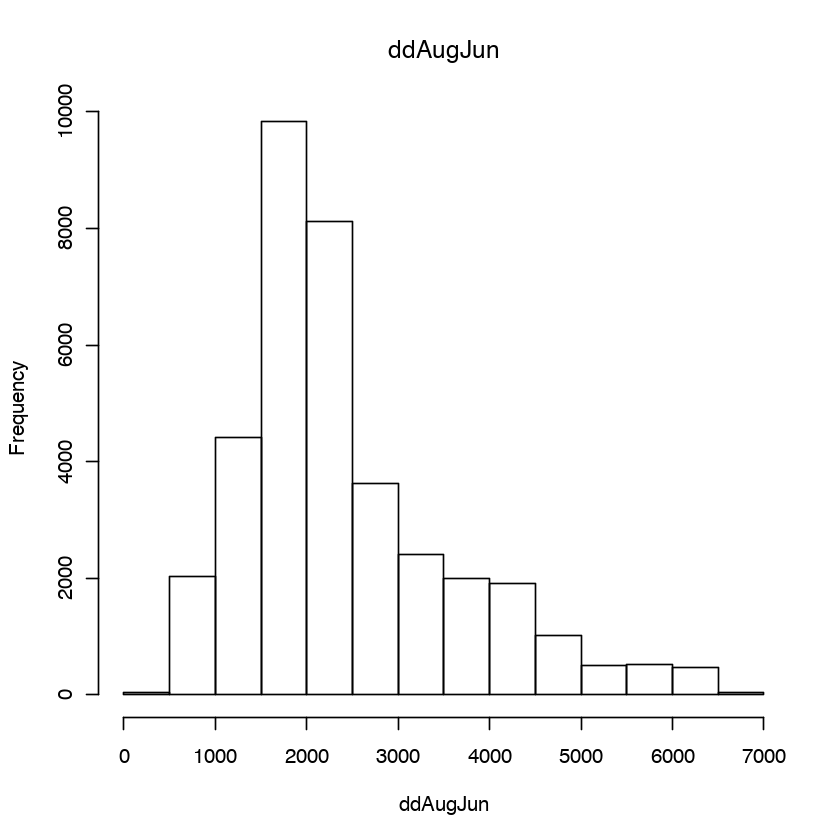

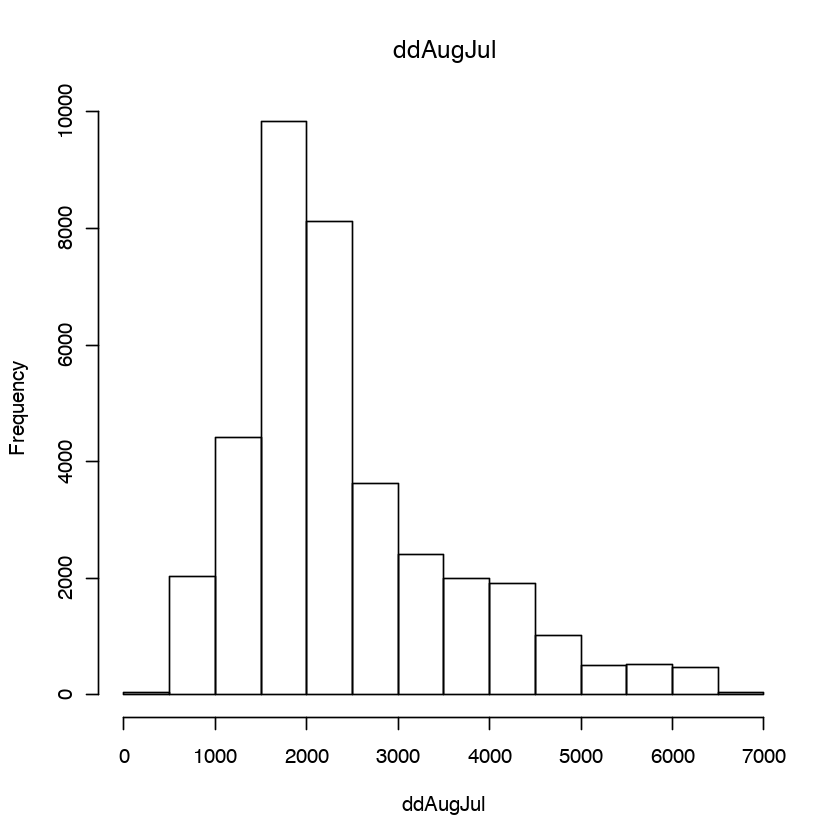

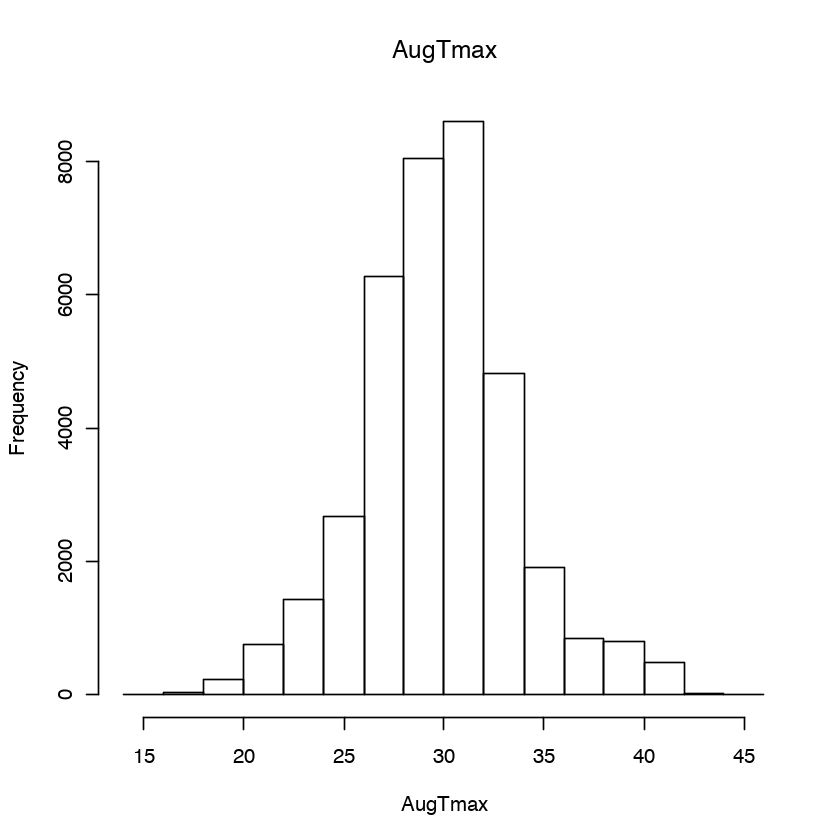

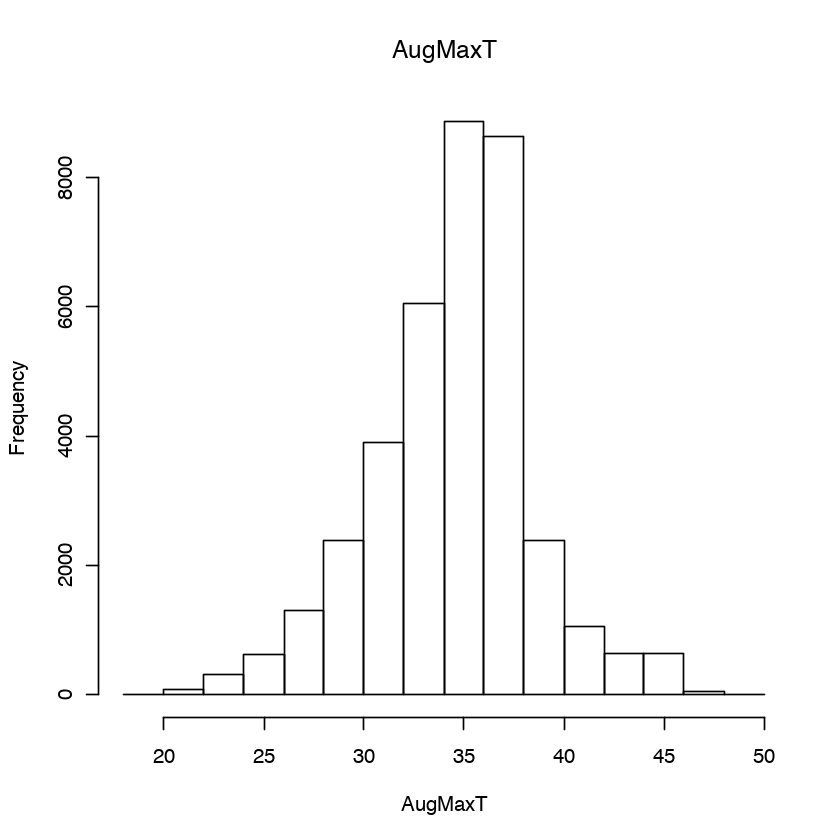

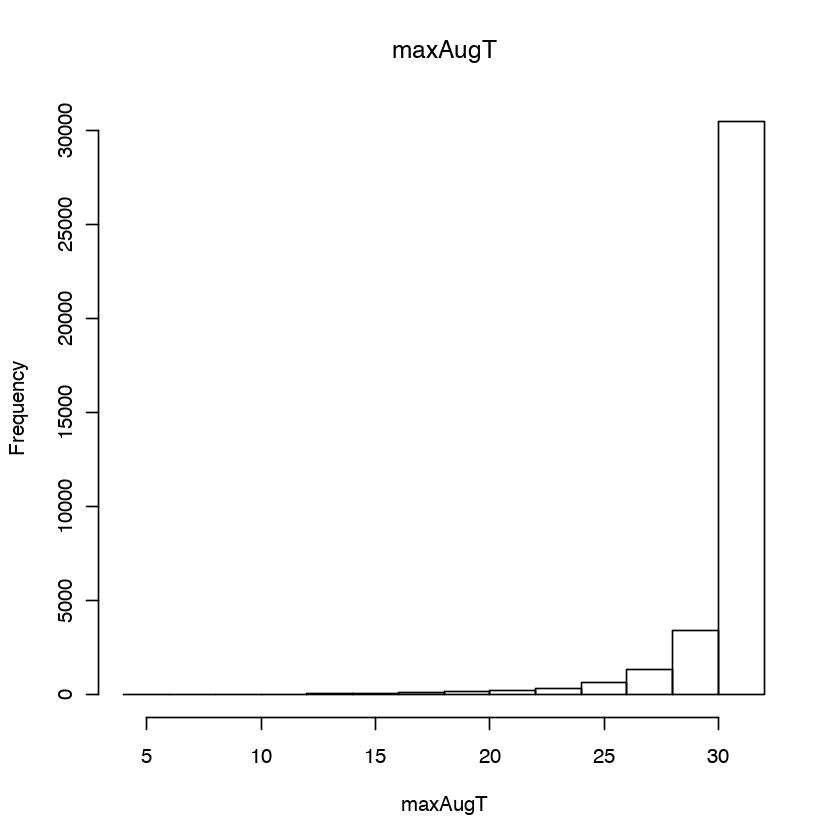

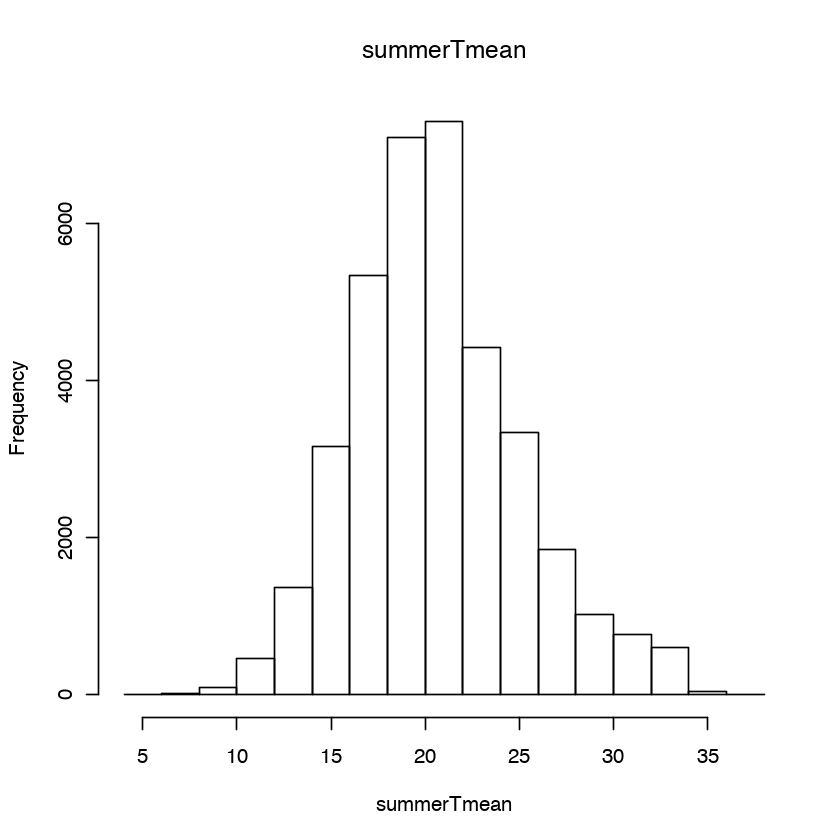

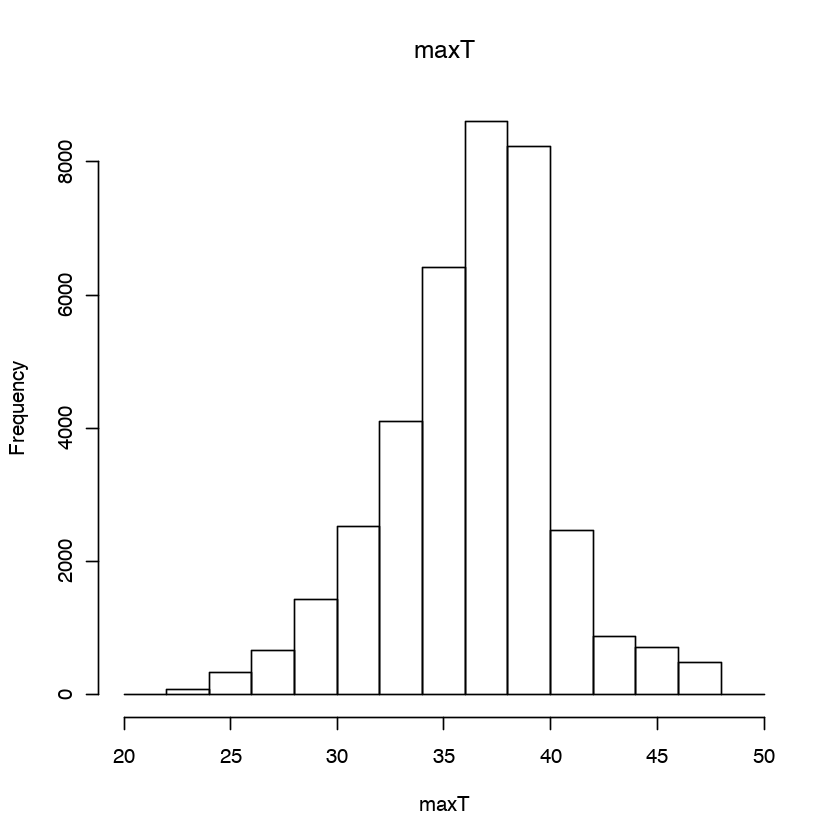

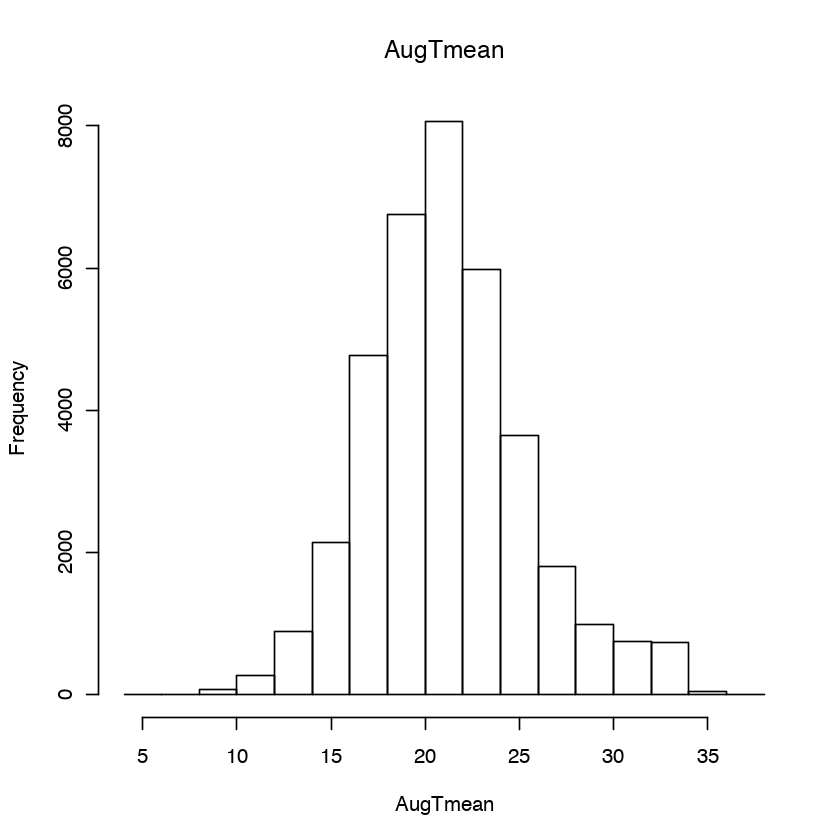

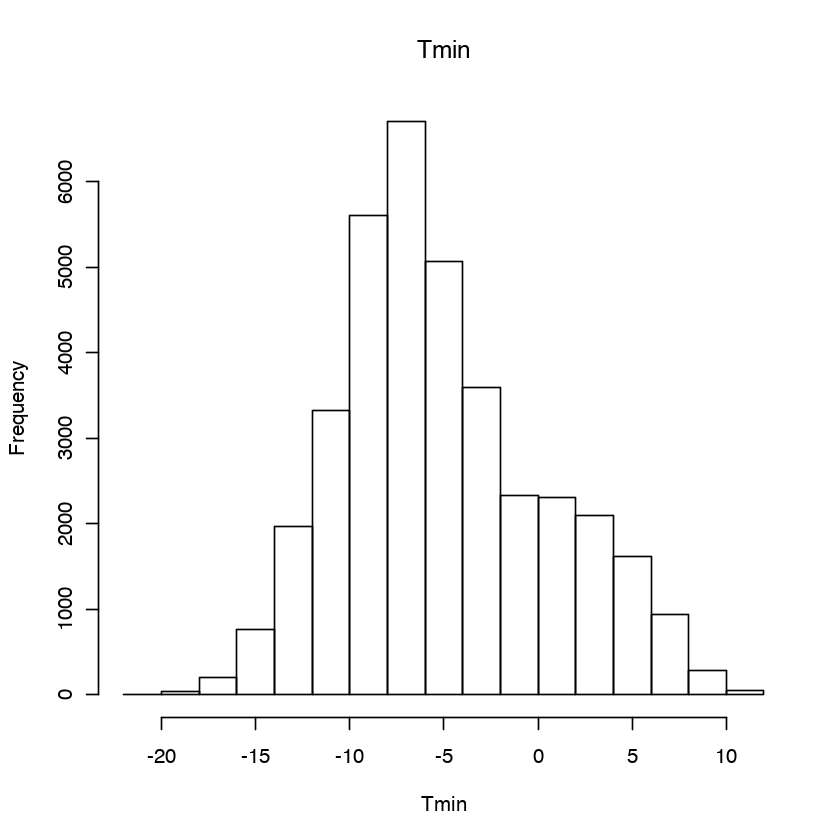

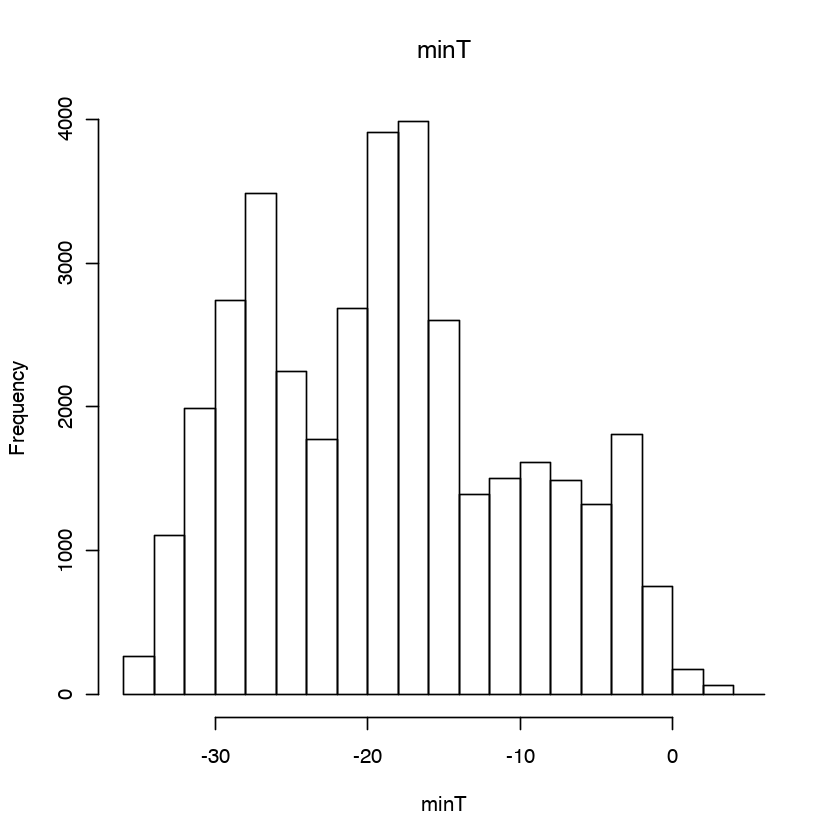

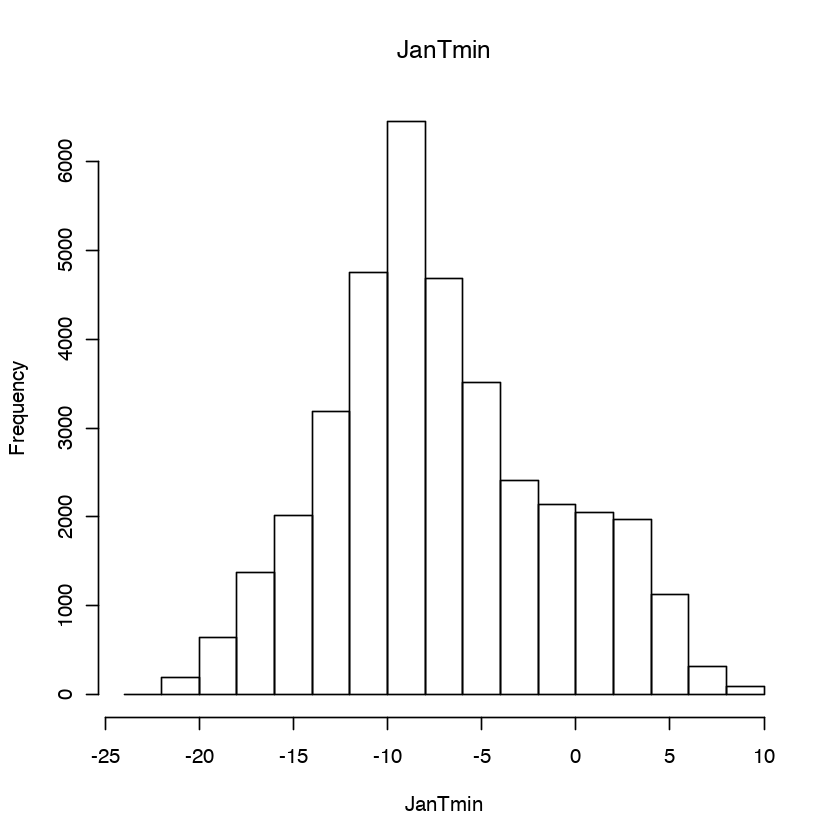

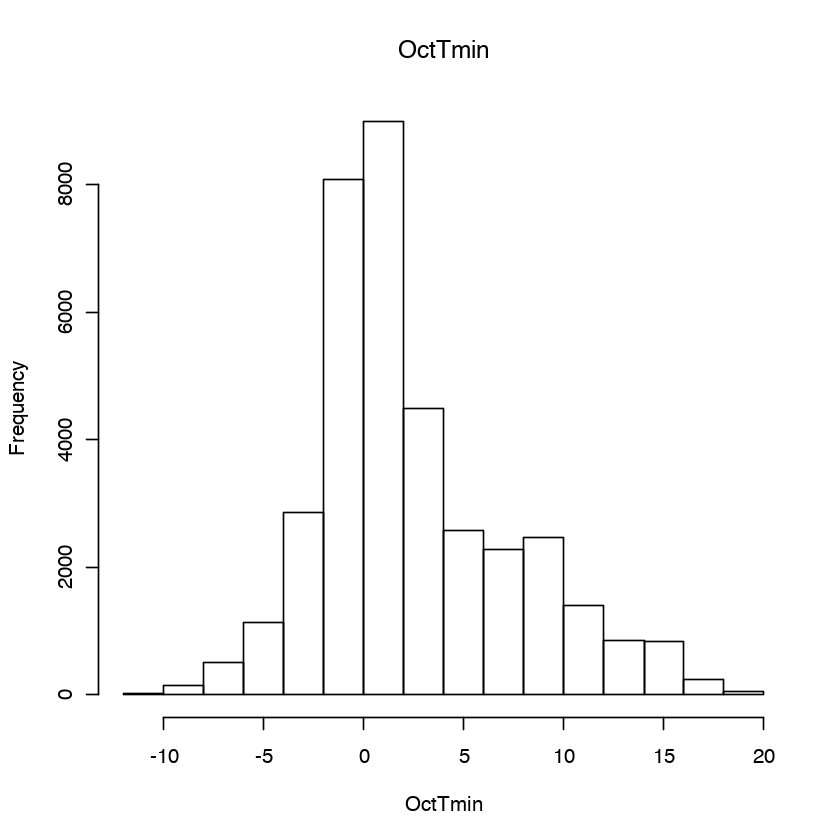

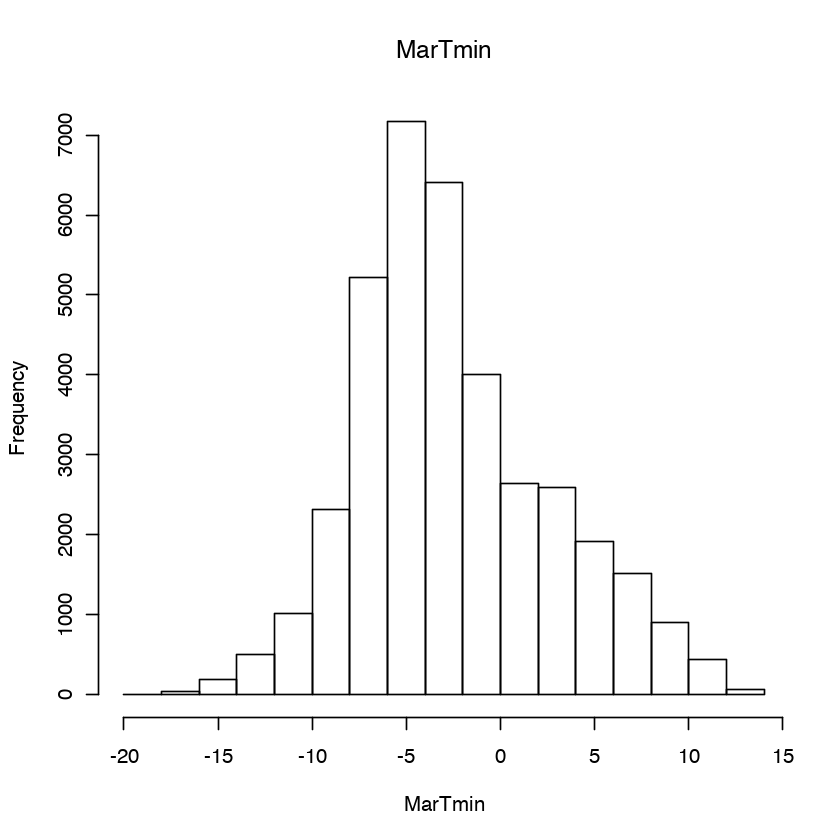

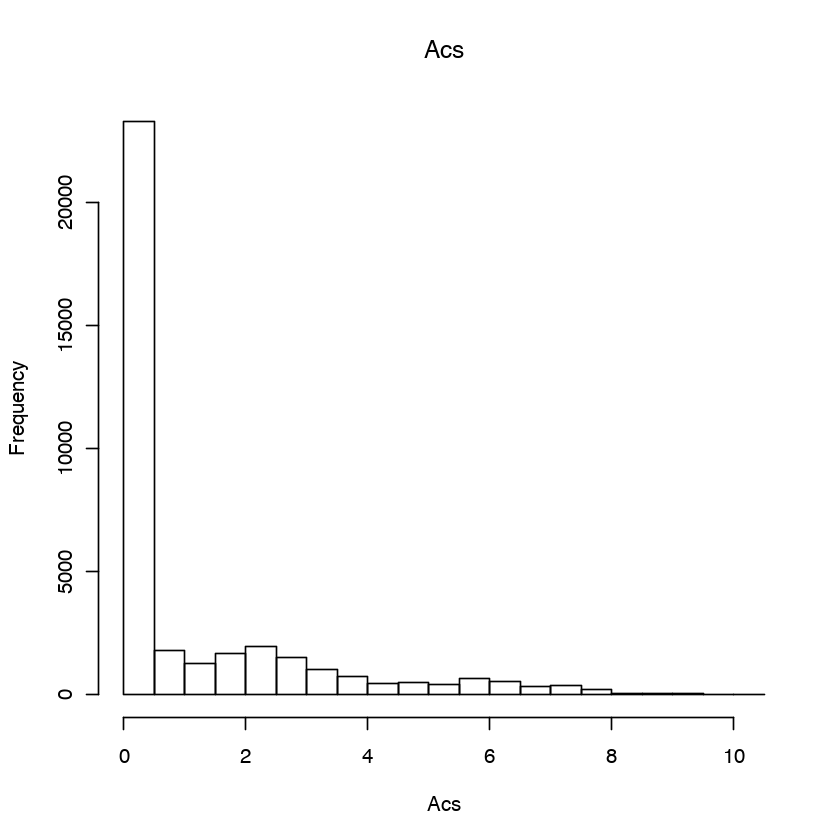

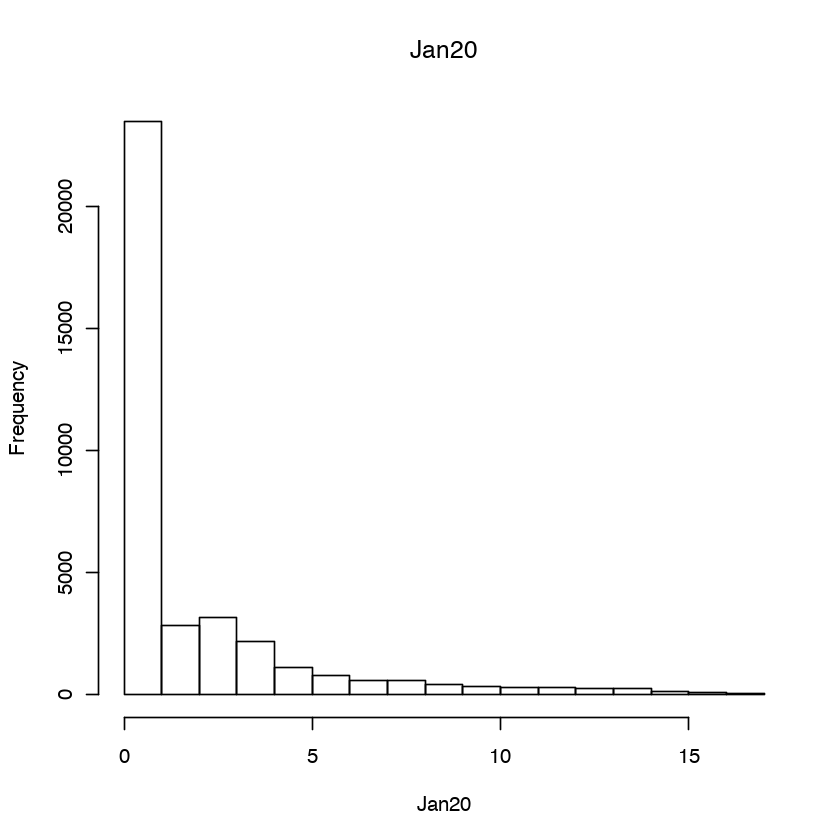

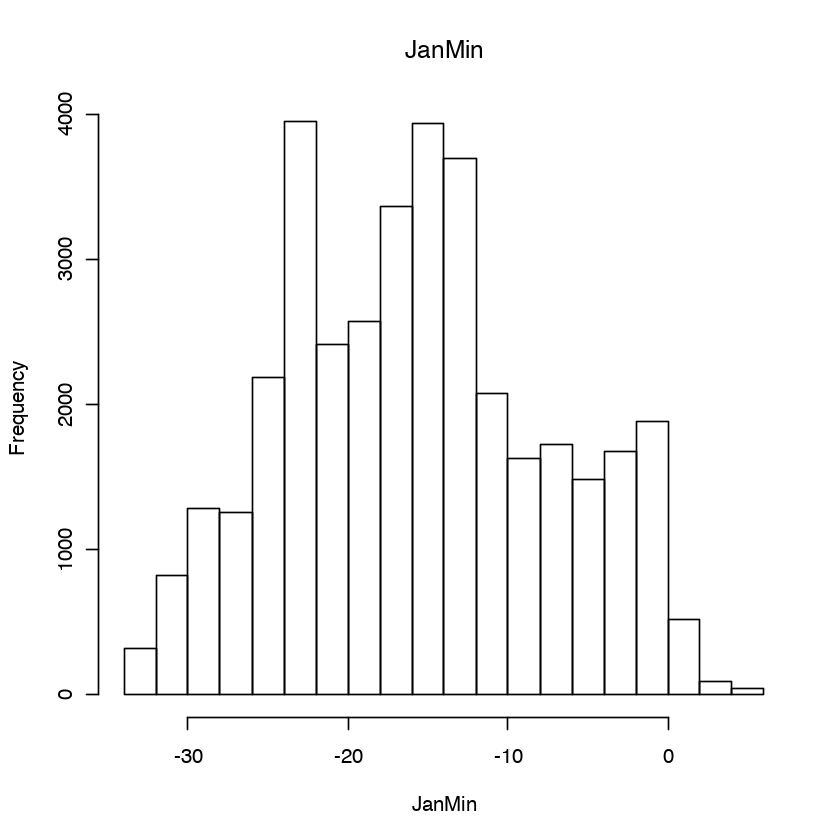

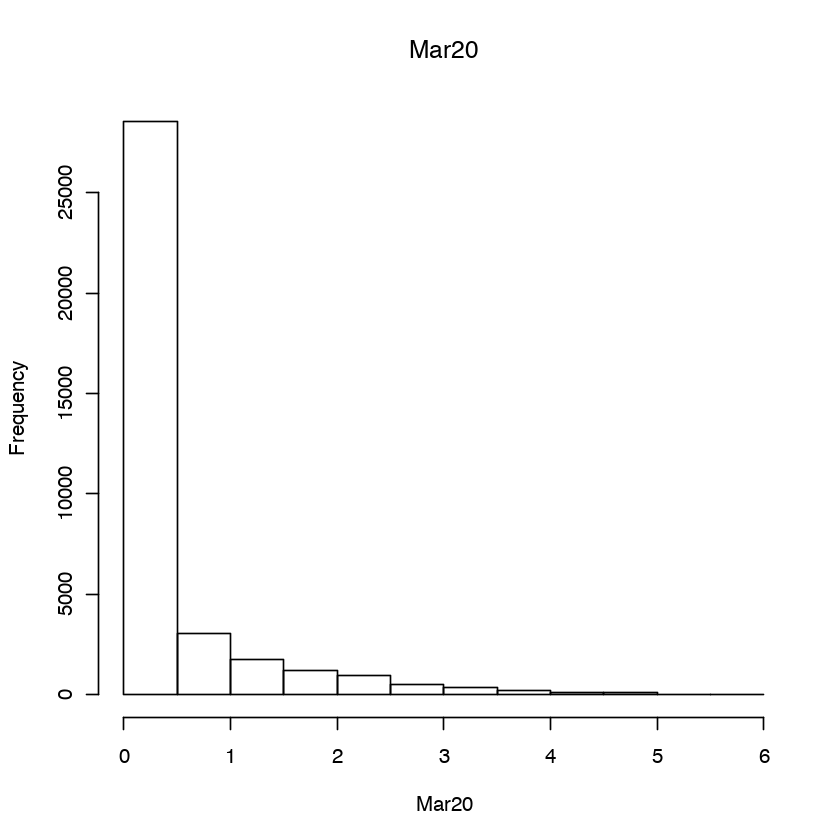

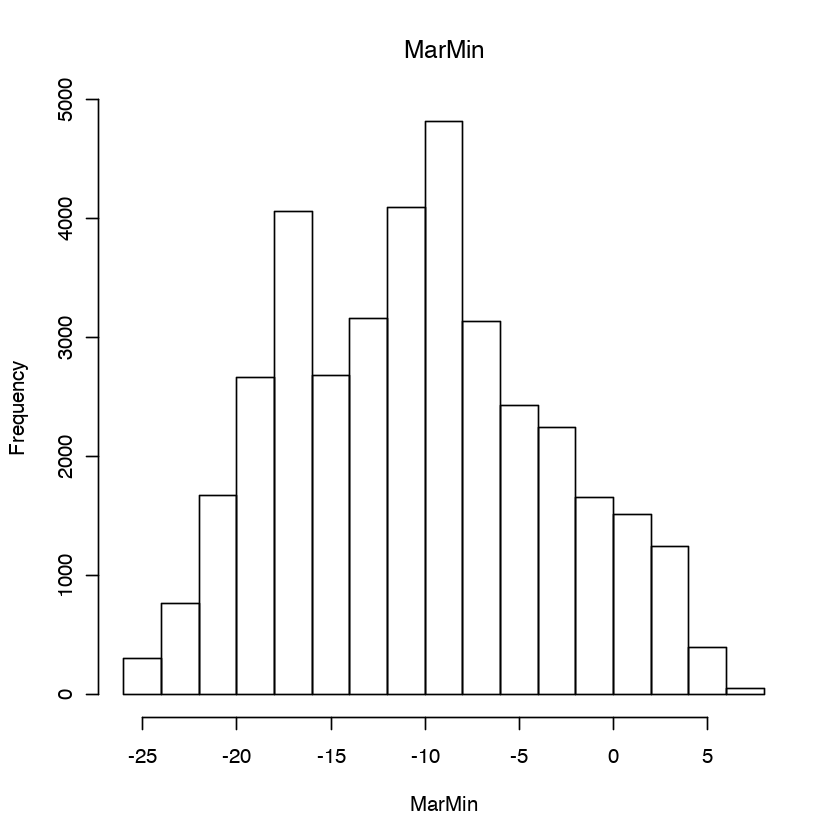

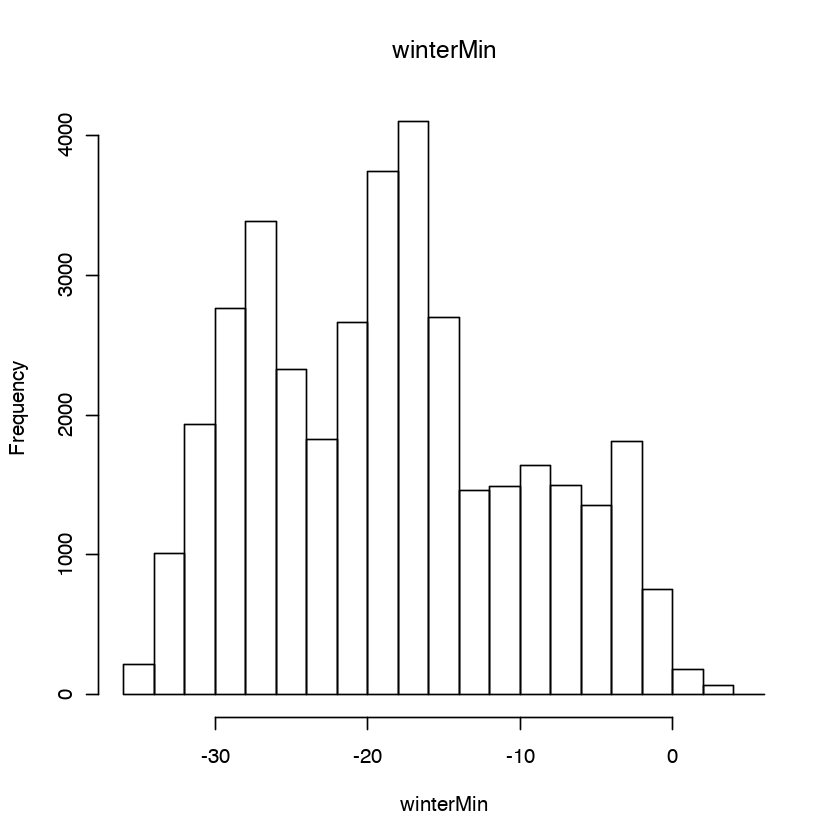

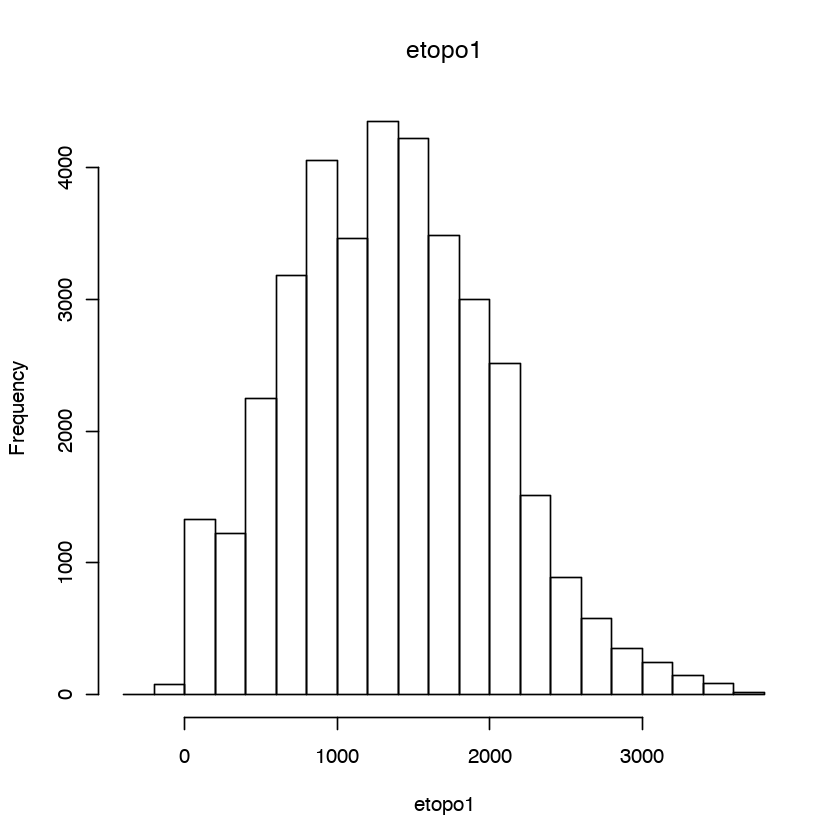

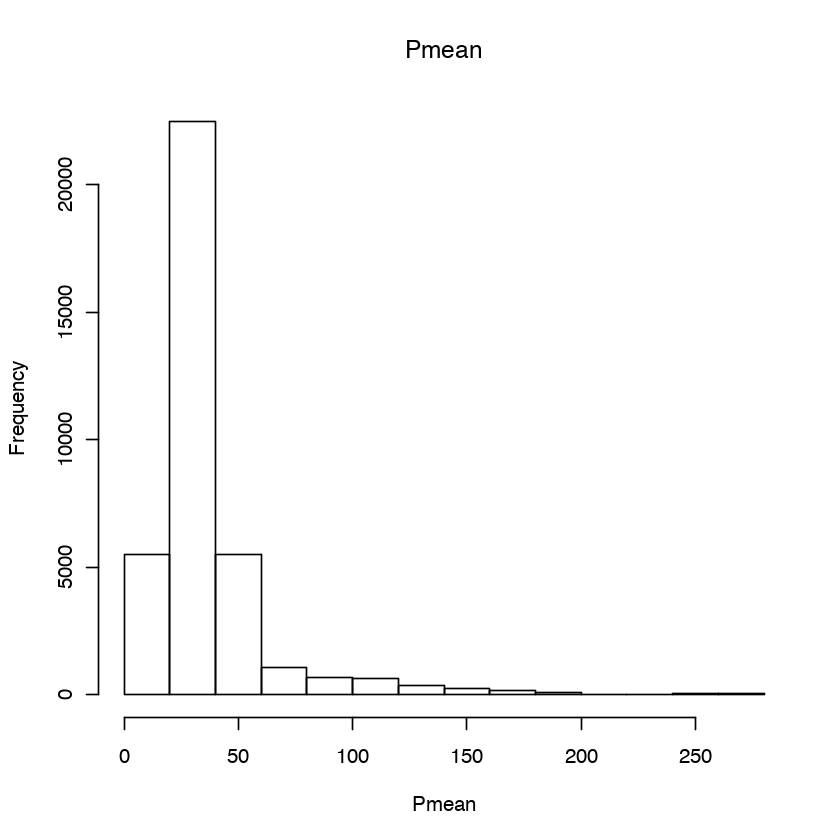

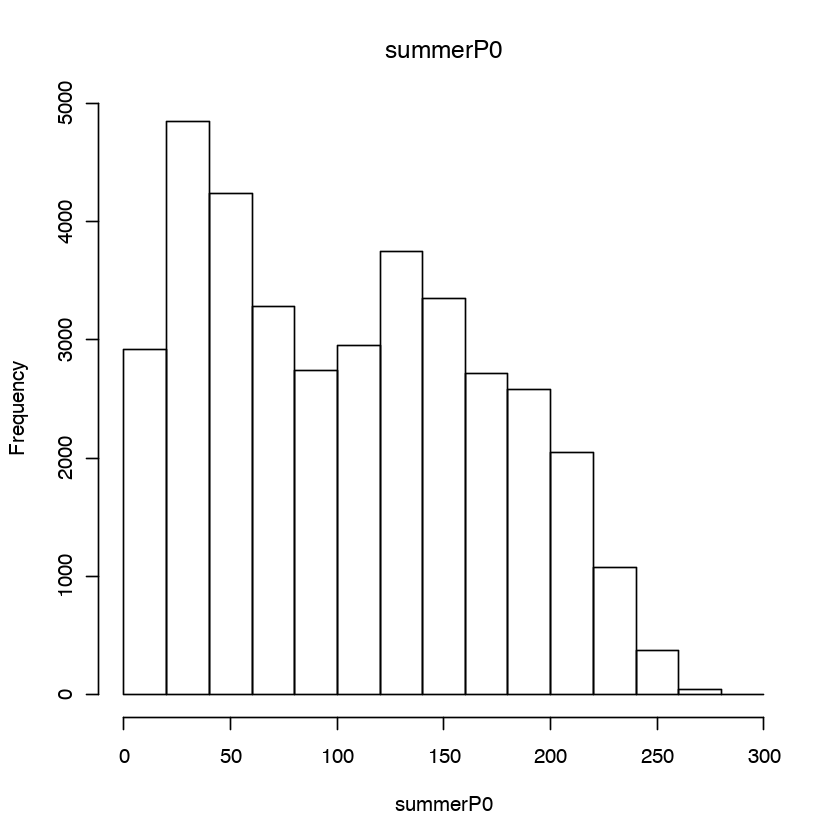

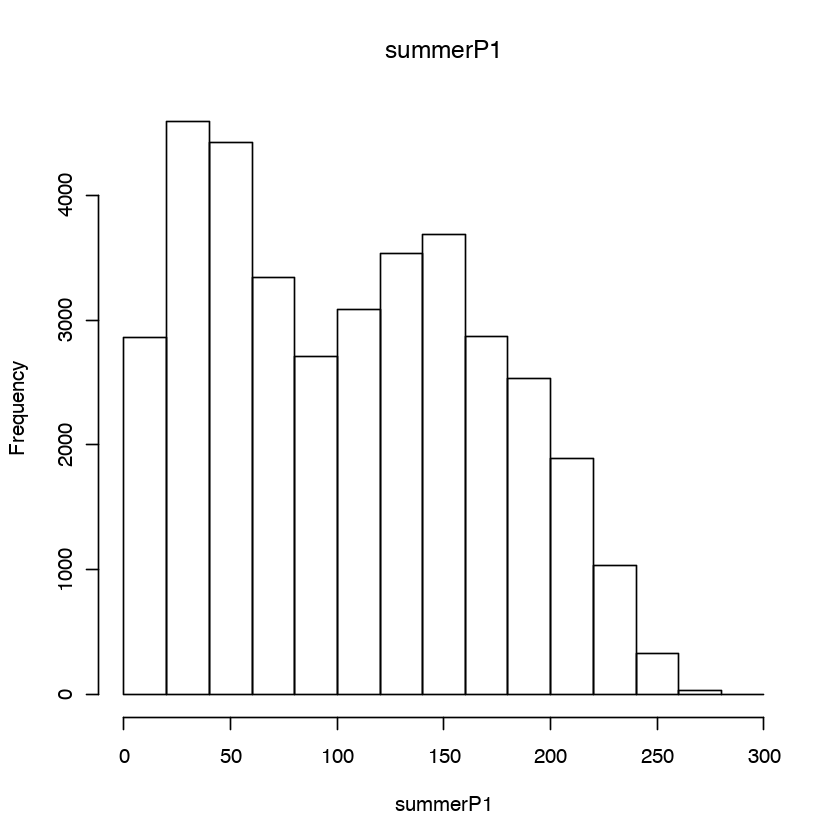

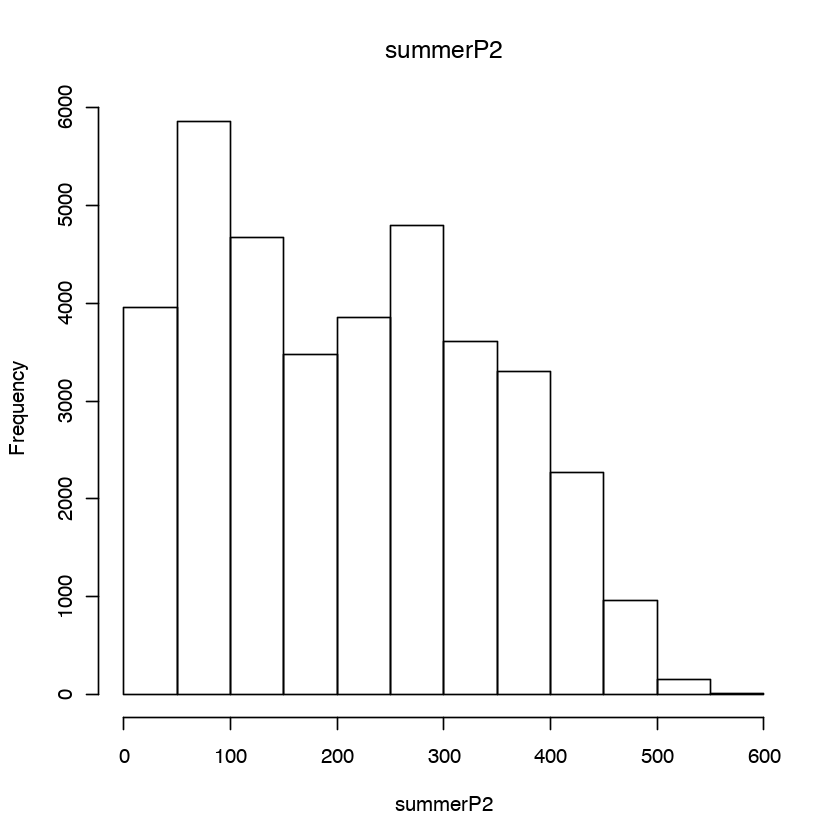

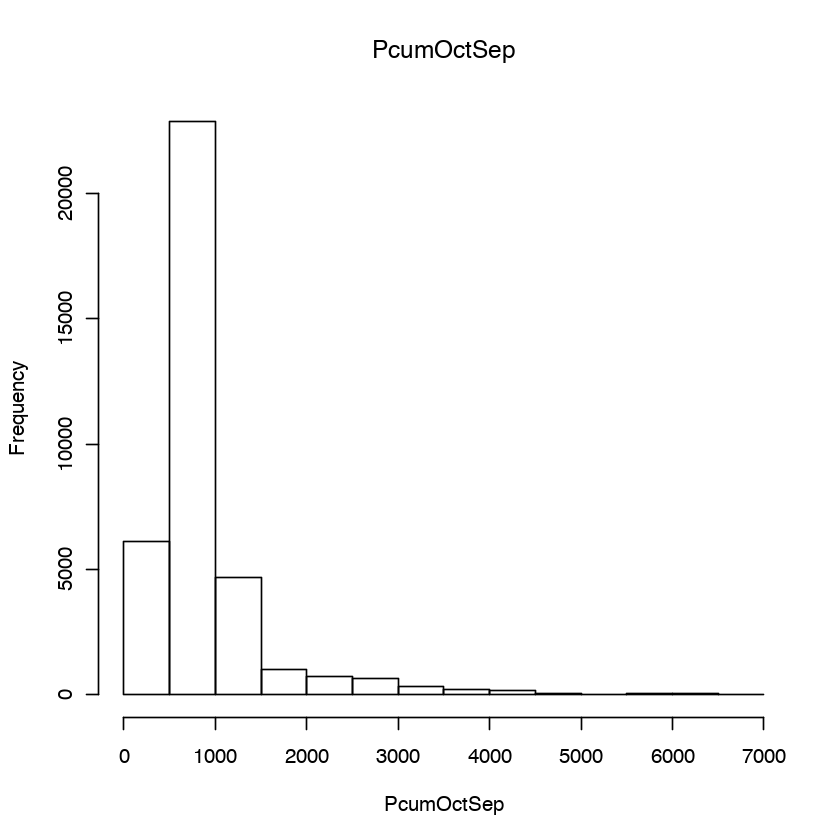

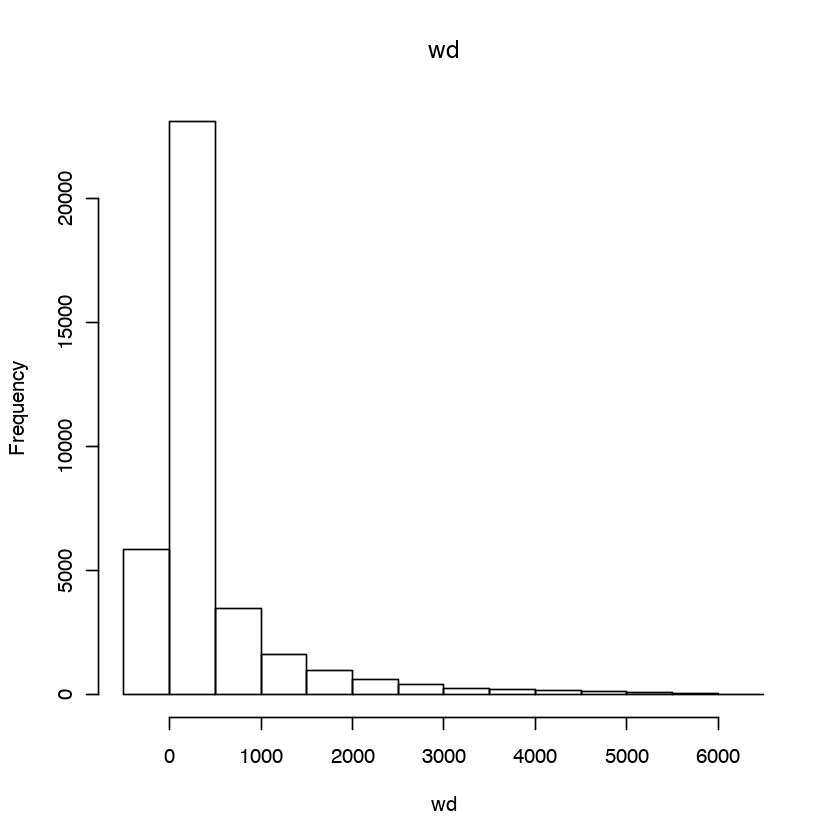

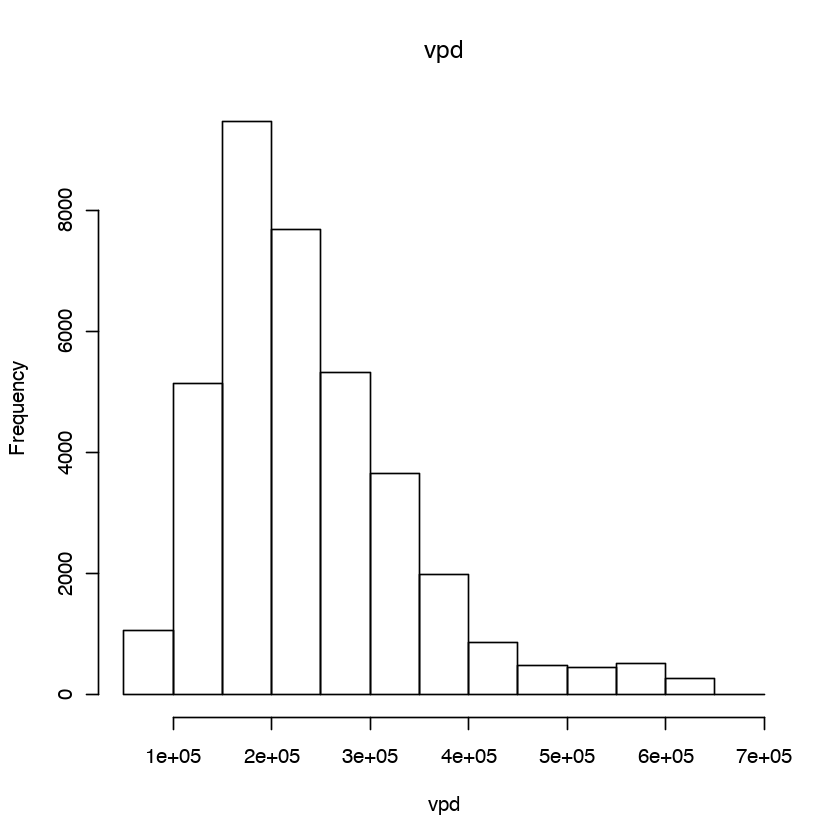

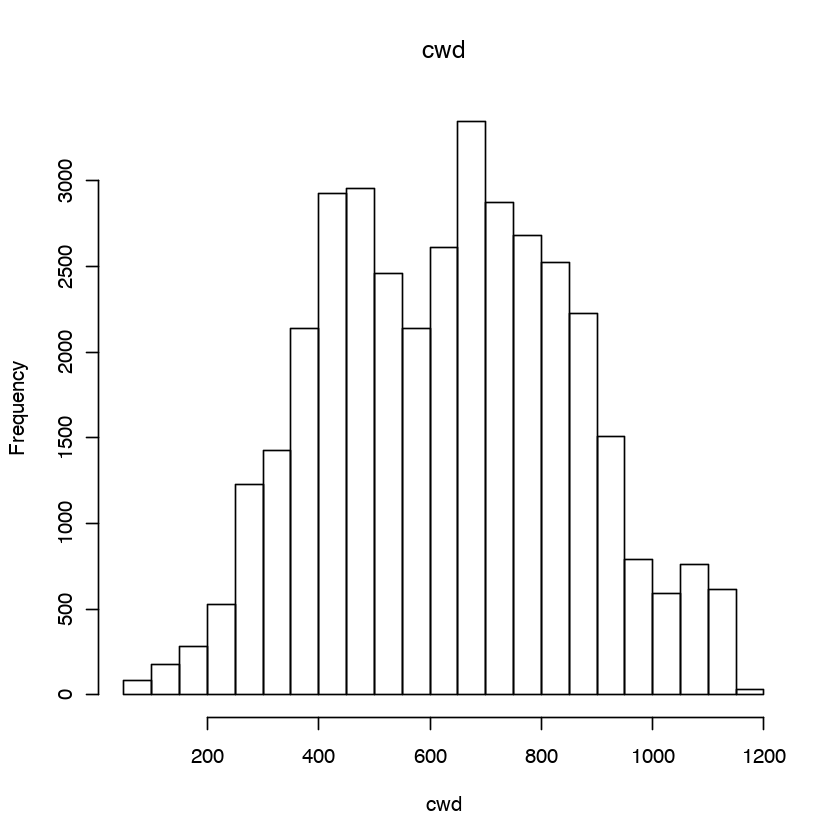

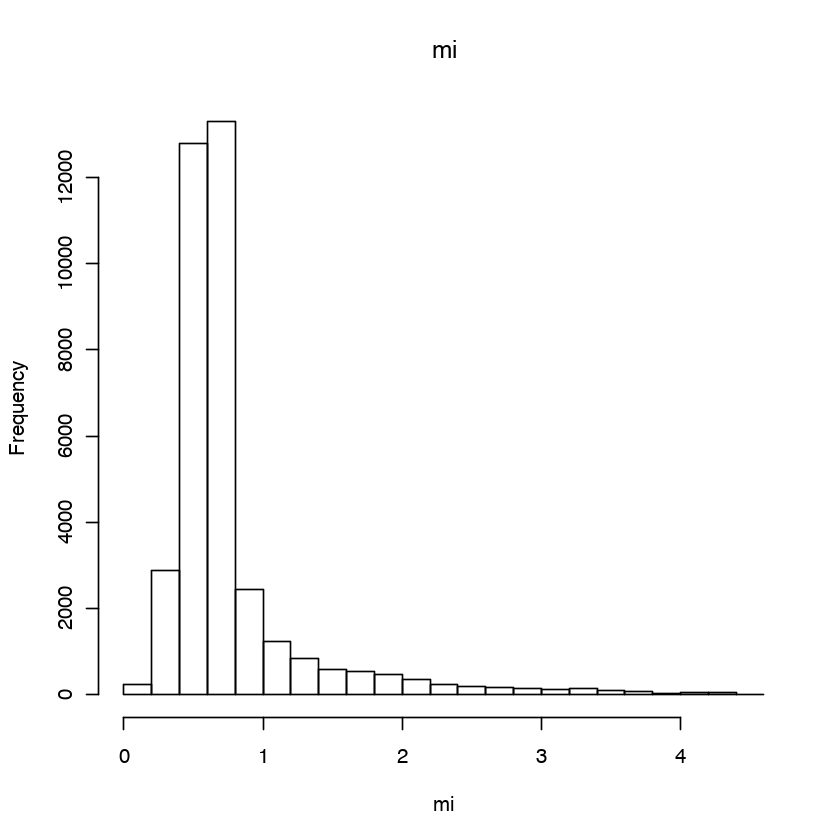

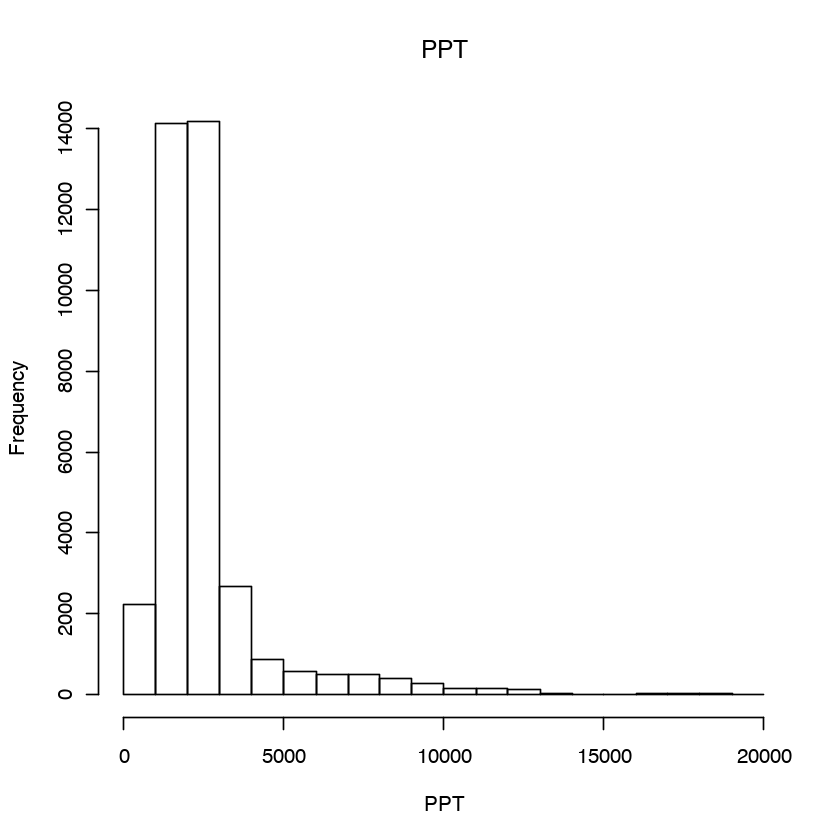

In [8]:
for(i in 1:dim(data)[2]){
    hist(data[,i], main=colnames(data)[i], xlab=colnames(data)[i])
}

In [9]:
cutpts <- data.frame(#Tmean
                        Tmean=c(-5,-3,0,5,8,10,15,20,21,23,25),
                        #Tvar
                        Tvar=c(0,2,4,6,7,8,10,12,14,16,19),
                        #fallTmean
                        fallTmean=c(-3,-2,0,2,5,7,9,11,13,18,26),
                        #TOctSep
                        TOctSep=c(-5,-3,0,3,6,9,11,13,15,18,25),
                        #TMarAug
                        TMarAug=c(0,2,5,8,11,13,16,18,20,25,32),
                        #ddAugJun
                        ddAugJun=c(350,750,1000,1500,2000,2500,3000,4000,5000,6000,7000),
                        #ddAugJul
                        ddAugJul=c(350,750,1000,1500,2000,2500,3000,4000,5000,6000,7000),
                        #AugTmax
                        AugTmax=c(15,20,24,28,29,30,31,36,39,42,45),
                        AugMaxT=c(19,26,31,32,34,36,38,40,42,45,50),
                        #maxAugT
                        maxAugT=c(4,10,15,20,25,30,30.1,30.2,30.5,30.8,31),
                        #summerTmean
                        summerTmean=c(5,8,12,15,18,20,21,25,30,35,40),
                        maxT=c(20,25,30,35,36,38,40,42,45,48,50),
                        #AugTmean
                        AugTmean=c(5,10,15,18,20,21,23,25,30,35,40),
                        #Tmin
                        Tmin=c(-20,-10,-8,-5,-1,0,2,5,8,10,11),
                        minT=c(-35,-30,-25,-20,-18,-16,-14,-12,-10,-6,5),
                        #JanTmin
                        JanTmin=c(-23,-18,-13,-10,-7,-3,0,3,5,7,10),
                        #OctTmin
                        OctTmin=c(-12,-8,-5,-2,0,1,2,5,10,15,20),
                        #MarTmin
                        MarTmin=c(-19,-16,-10,-5,-3,0,1,3,5,8,14),
                        #Acs
                        Acs=c(0,0.2,0.5,0.8,1.2,1.5,2,4,6,8,10.3),
                        Jan20=c(0,0.2,0.3,0.5,0.8,1.5,2,2.5,5,10,16.9),
                        JanMin=c(-33.8,-27,-25,-22,-18,-15,-12,-10,0,5,6),
                        Mar20=c(0,0.2,0.4,0.6,0.8,1,2,3,4,5,6),
                        MarMin=c(-26,-20,-15,-10.5,-10,-9.5,-5,0,2,4,8),
                        winterMin=c(-35.2,-30,-25,-20,-18,-16,-14,-12,-10,1,5),
                        #Pmean 
                        Pmean=c(2,5,10,15,20,25,30,35,40,100,280),
                        #summerP0
                        summerP0=c(2,18,36,48,80,100,120,150,180,200,300),
                        #summerP1
                        summerP1=c(1.8,5,20,50,100,120,150,180,200,250,300),
                        #summerP2
                        summerP2=c(4,30,80,100,150,200,210,250,300,420,570),
                        #PcumOctSep
                        PcumOctSep=c(69,300,500,750,900,950,1000,2000,4000,6000,6700),
                        wd=c(-300, -100, 0, 100, 300, 450, 500, 1000, 3000, 5000, 6100), 
                        vpd=c(50000,80000,120000,160000,180000,200000,300000,400000,500000,600000,700000),
                        cwd=c(50,100,200,300,400,500,600,800,900,1100,1200),
                        mi=c(0.1,0.2,0.4,0.5,0.6,0.7,0.8,1.0,1.5,3,4.5),
                        #PPT
                        PPT=c(200,1000,1500,2000,2500,2800,3000,4000,6000,8000,19200),
                        etopo1=c(-250,-100,0,500,800,1200,1300,1400,1800,2600,3700))

In [10]:
data <- cbind(data, loc[,c('x', 'y')])

In [11]:
pos <- cbind(c(1,1),c(2,1),c(3,1),c(4,1),c(5,1),
             c(1,2),c(2,2),c(3,2),c(4,2),c(5,2),
             c(1,3),c(2,3),c(3,3),c(4,3),c(5,3),
             c(1,4),c(2,4),c(3,4),c(4,4),c(5,4),
             c(1,5),c(2,5),c(3,5),c(4,5),c(5,5),
             c(1,6),c(2,6),c(3,6),c(4,6),c(5,6),
             c(1,7),c(2,7),c(3,7),c(4,7),c(5,7)) 

In [12]:
pos

1,2,3,4,5,1,2,3,4,5,⋯,1,2,3,4,5,1,2,3,4,5
1,1,1,1,1,2,2,2,2,2,⋯,6,6,6,6,6,7,7,7,7,7


In [13]:
png(paste0(out, "mpb10km_bioclimatic_maps.png"), width=20, height=28, units="in", res=300)
plot.new()
par(mfrow=c(7,5), xpd=FALSE, mar=rep(0.5,4))
for(v in vars){
    i <- which(vars==v)
    var.array <- array(data[,v], dim=c(nx,ny))
    if(v %in% c('Tvar','Acs', 'Jan20', 'Mar20')){
        p <- levelplot(var.array ~ x * y, data=data, at=cutpts[,v], cuts=10, pretty=T, 
            col.regions=brewer.pal(10,"RdBu"),
            par.settings = list(axis.line = list(col = "transparent")), 
            scales = list(draw = FALSE), margin=F, main=list(label=v, cex=1.5),
            xlab="", ylab="", aspect="iso")  
    }else if(v %in% c('Pmean','summerP0','summerP1','summerP2','PcumOctSep','wd','mi','PPT')){
        p <- levelplot(var.array ~ x * y, data=data, at=cutpts[,v], cuts=10, pretty=T, 
            col.regions=brewer.pal(10,"RdYlGn"),
            par.settings = list(axis.line = list(col = "transparent")), 
            scales = list(draw = FALSE), margin=F, main=list(label=v, cex=1.5),
            xlab="", ylab="", aspect="iso")     
    }else if(v %in% c('vpd','cwd')){
        p <- levelplot(var.array ~ x * y, data=data, at=cutpts[,v], cuts=10, pretty=T, 
            col.regions=rev(brewer.pal(10,"RdYlGn")),
            par.settings = list(axis.line = list(col = "transparent")), 
            scales = list(draw = FALSE), margin=F, main=list(label=v, cex=1.5),
            xlab="", ylab="", aspect="iso")
    }else if(v == 'etopo1'){
        p <- levelplot(var.array ~ x * y, data=data, at=cutpts[,v], cuts=10, pretty=T, 
            col.regions=rev(brewer.pal(10,"BrBG")),
            par.settings = list(axis.line = list(col = "transparent")), 
            scales = list(draw = FALSE), margin=F, main=list(label=v, cex=1.5),
            xlab="", ylab="", aspect="iso")
    }else{
        p <- levelplot(var.array ~ x * y, data=data, at=cutpts[,v], cuts=10, pretty=T, 
            col.regions=rev(brewer.pal(10,"RdBu")),
            par.settings = list(axis.line = list(col = "transparent")), 
            scales = list(draw = FALSE), margin=F, main=list(label=v, cex=1.5),
            xlab="", ylab="", aspect="iso") 
    }
    p <- p + latticeExtra::layer(sp.polygons(mpb10km, lwd=0.8, col='dimgray', alpha=0.3))
    p <- p + latticeExtra::layer(sp.polygons(lrglakes, lwd=0.8, col='dimgray', fill='lightblue', alpha=0.3))
    print(p, split=c(pos[,i][1], pos[,i][2],5,7), newpage=FALSE)
    print(v)
}
dev.off()

[1] "Tmean"
[1] "Tvar"
[1] "fallTmean"
[1] "TOctSep"
[1] "TMarAug"
[1] "ddAugJun"
[1] "ddAugJul"
[1] "AugTmax"
[1] "AugMaxT"
[1] "maxAugT"
[1] "summerTmean"
[1] "maxT"
[1] "AugTmean"
[1] "Tmin"
[1] "minT"
[1] "JanTmin"
[1] "OctTmin"
[1] "MarTmin"
[1] "Acs"
[1] "Jan20"
[1] "JanMin"
[1] "Mar20"
[1] "MarMin"
[1] "winterMin"
[1] "etopo1"
[1] "Pmean"
[1] "summerP0"
[1] "summerP1"
[1] "summerP2"
[1] "PcumOctSep"
[1] "wd"
[1] "vpd"
[1] "cwd"
[1] "mi"
[1] "PPT"


pdf 
  2

In [111]:
GACC <- readOGR(dsn = paste0(shppath,'/National_GACC_Boundaries_2018'), layer = "National_GACC_Boundaries_2018")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp/National_GACC_Boundaries_2018", layer: "National_GACC_Boundaries_2018"
with 10 features
It has 10 fields
Integer64 fields read as strings:  OBJECTID FID_Nation 


In [114]:
GACC <- spTransform(GACC, crs)

In [115]:
library(rgeos)

rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.6.1-CAPI-1.10.1 r0 
 Linking to sp version: 1.2-5 
 Polygon checking: TRUE 



In [116]:
clip <- gIntersection(GACC, mpb10km, byid = TRUE, drop_lower_td = TRUE)

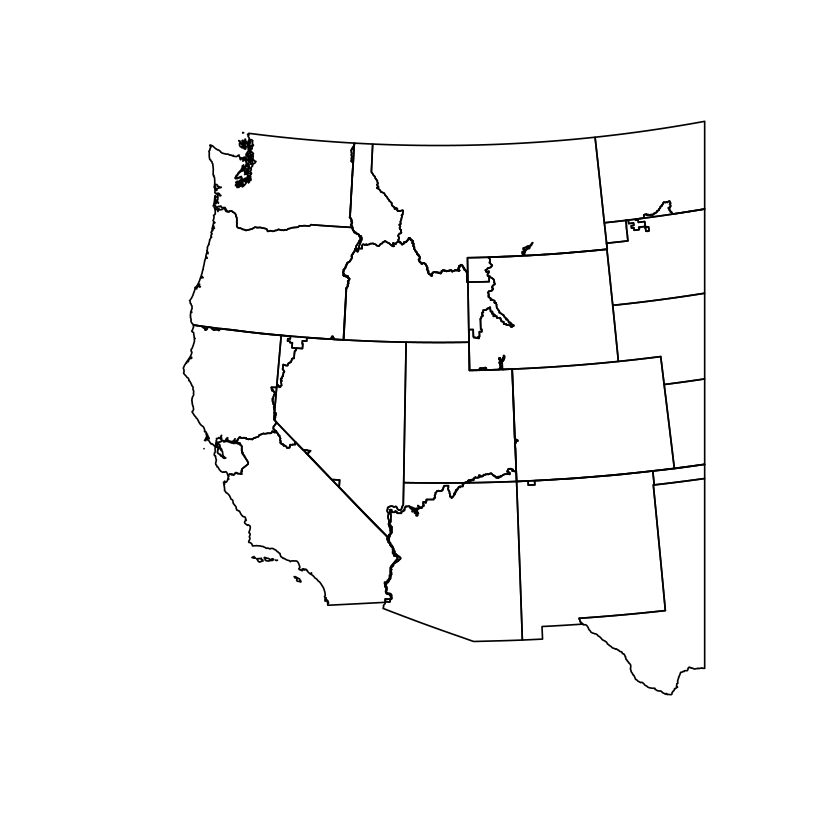

In [117]:
plot(clip)